In [1]:
import numpy as np
import sys
sys.path.insert(0, "..")
from farkas.solver import MILP, LP
from farkas.problem import QSHeur, Subsystem
from farkas.model import DTMC, MDP

In [2]:
M = DTMC.from_prism_model("datasets/brp.pm",
                          prism_constants={("N",2),("MAX",1)},
                          extra_labels={("uncertain","s=5 & srep=2"),("all","true")})

# M = MDP.from_file("datasets/csma-2-2.lab", "datasets/csma-2-2.tra")
M

DTMC(C=62, N=62, labels={init (1), deadlock (6), uncertain (2), all (62)})

In [3]:
# M.digraph()

In [4]:
reach_form, _ = M.reachability_form("init","deadlock")
# DTMC.from_reachability_form(reach_form).digraph()

In [5]:
qs_min_heur = QSHeur(0.03,"min",iterations=2,solver_name="cbc")
results = list(qs_min_heur.solve(reach_form))
print("-- results --")
for idx, r in enumerate(results):
    print(r)

-- results --
ProblemResult(status=success, subsystem=MinimalWitness(system=ReachabilityForm(C=62, N=62, initial=0), states=15.0))
ProblemResult(status=success, subsystem=MinimalWitness(system=ReachabilityForm(C=62, N=62, initial=0), states=15.0))


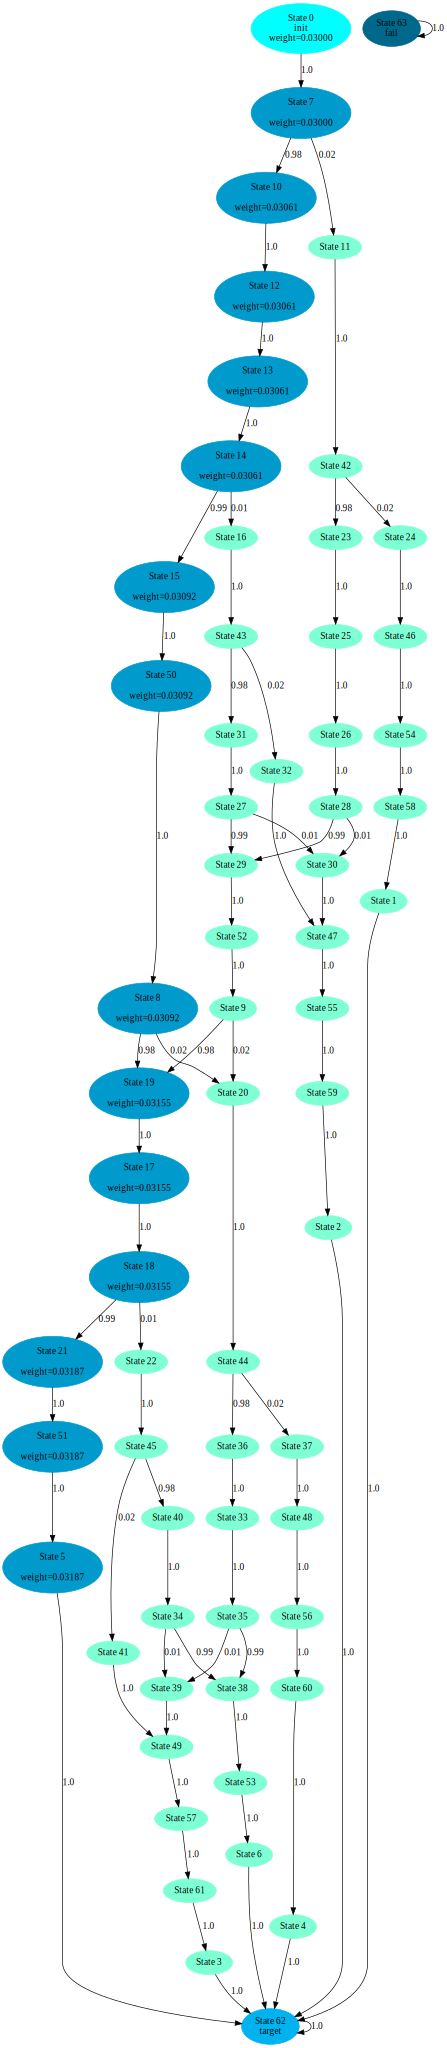

In [7]:
first = results[1]
first.subsystem.digraph()

In [9]:
qs_max_heur = QSHeur(0.03,"max",solver_name="cbc")
results = list(qs_max_heur.solve(reach_form))
print("-- results --")
for idx, r in enumerate(results):
    print(r)

-- results --
ProblemResult(status=success, subsystem=MinimalWitness(system=ReachabilityForm(C=62, N=62, initial=0), states=62.0))
ProblemResult(status=success, subsystem=MinimalWitness(system=ReachabilityForm(C=62, N=62, initial=0), states=15.0))
ProblemResult(status=success, subsystem=MinimalWitness(system=ReachabilityForm(C=62, N=62, initial=0), states=15.0))


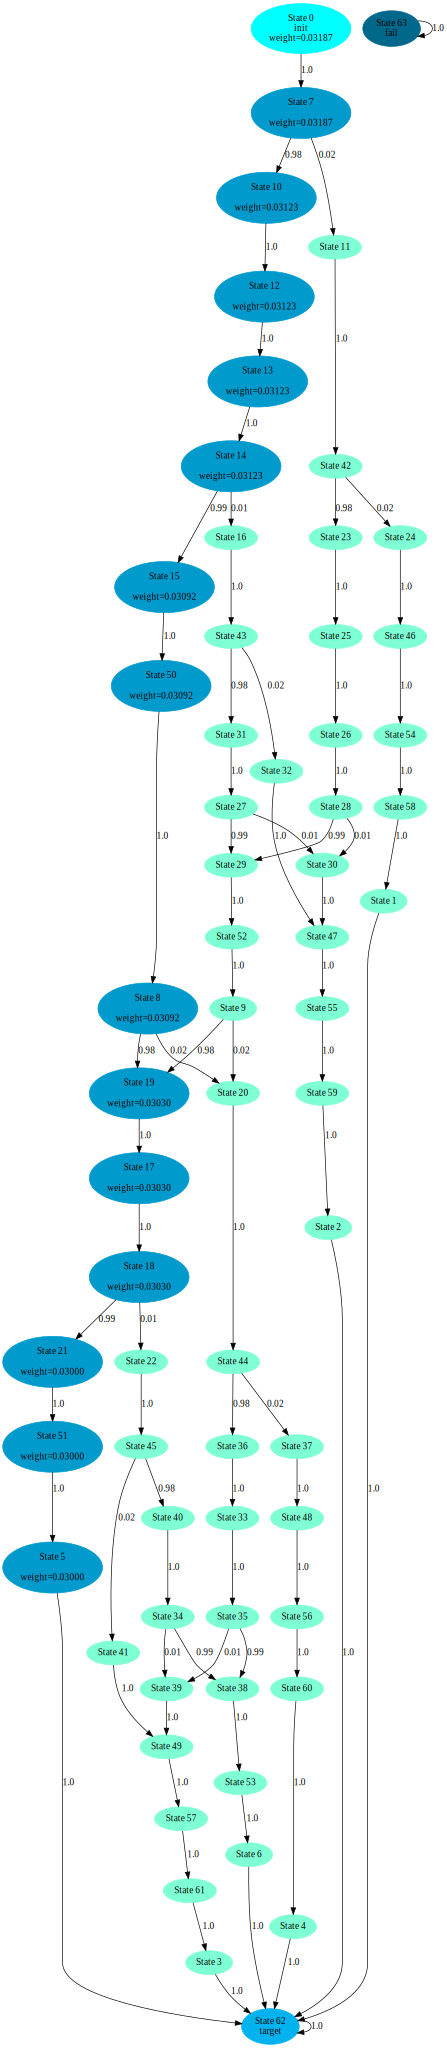

In [10]:
first = results[2]
first.subsystem.digraph()